In [203]:
# Librerias

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()

#%config InlineBackend.figure_format = 'svg'

In [204]:
# Abrir dataset churn

df = pd.read_csv("Train_data_intrusion.csv")
df_test = pd.read_csv("Test_data_intrusion.csv")

# Verificar el dataset
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [205]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [206]:
# Reviso las caracteristicas del dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [207]:
# Class es la variable que queremos predecir, anomalias o incidencias en una red

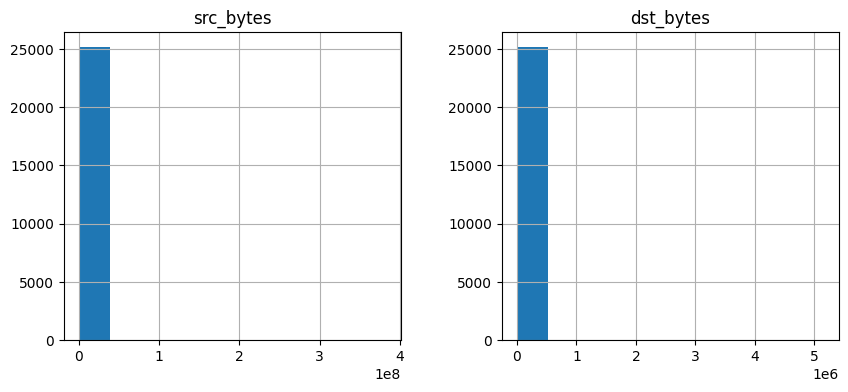

In [208]:
# Exploracion de datos
# Genero un histograma de la variable total day minutes para ver la distribucion de los datos

features = ['src_bytes','dst_bytes']
df[features].hist(figsize=(10,4));

<Axes: xlabel='protocol_type', ylabel='Count'>

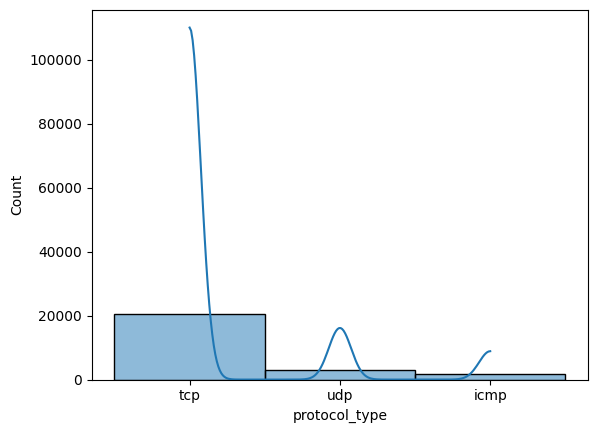

In [209]:
# Histograma con la densidad de las variables

sns.histplot(df['protocol_type'], kde=True)

In [210]:
# Resumen estadistico de las variables

df[features].describe()

,src_bytes,dst_bytes
count,2.519200e+04,2.519200e+04
mean,2.433063e+04,3.491847e+03
std,2.410805e+06,8.883072e+04
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,4.400000e+01,0.000000e+00
75%,2.790000e+02,5.302500e+02
max,3.817091e+08,5.151385e+06


In [211]:
# Si revisamos la variable objetivo, podemos ver que hay un desbalanceo de clases

df['class'].value_counts()

class
normal     13449
anomaly    11743
Name: count, dtype: int64

<Axes: xlabel='class', ylabel='count'>

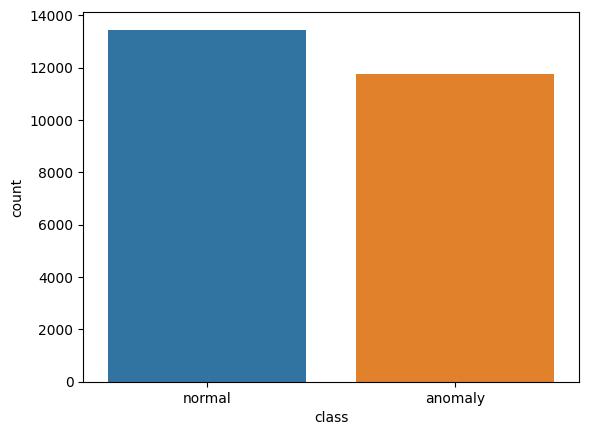

In [212]:
# Grafico de barras de la variable churn
sns.countplot(x='class', data = df)

In [213]:
# Seleccionamos las variables numericas
numerical = list(df.dtypes[df.dtypes != 'object'].index)

# Matriz de correlacion
corr_matrix = df[numerical].corr()
corr_matrix

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.084864,0.013258,-0.001012,-0.010358,-0.000486,0.004202,0.011108,-0.063703,0.095215,...,0.055174,-0.112530,-0.119321,0.263489,0.240970,-0.025485,-0.066513,-0.066240,0.187070,0.208435
src_bytes,0.084864,1.000000,0.003611,-0.000090,-0.000916,-0.000062,0.000995,-0.000260,-0.002040,-0.000196,...,-0.009764,-0.008520,-0.006776,0.001026,0.002316,-0.001238,-0.006346,-0.006227,-0.002130,0.006190
dst_bytes,0.013258,0.003611,1.000000,-0.000350,-0.003586,0.000345,0.002539,0.005197,0.012704,0.035852,...,-0.030930,-0.000980,0.022392,-0.012971,0.024078,-0.006006,-0.015584,-0.014543,-0.014094,-0.012803
land,-0.001012,-0.000090,-0.000350,1.000000,-0.000813,-0.000056,-0.000819,-0.000234,-0.007196,-0.000195,...,-0.016340,-0.008743,0.009531,-0.003929,0.024635,0.053037,0.014291,0.005596,-0.003432,-0.003335
wrong_fragment,-0.010358,-0.000916,-0.003586,-0.000813,1.000000,-0.000575,-0.008386,-0.002392,-0.073674,-0.001995,...,0.040020,-0.047256,-0.051845,0.053177,0.034670,-0.020174,-0.053786,-0.057230,0.027718,-0.034143
urgent,-0.000486,-0.000062,0.000345,-0.000056,-0.000575,1.000000,0.002346,-0.000165,0.007801,0.002886,...,0.004612,-0.006324,-0.007014,-0.002105,-0.003013,-0.001815,-0.004044,-0.003953,-0.002427,-0.002358
hot,0.004202,0.000995,0.002539,-0.000819,-0.008386,0.002346,1.000000,0.004893,0.113115,0.002005,...,-0.009083,-0.048495,-0.033442,-0.007962,-0.030640,-0.021170,-0.055628,-0.056255,-0.027628,-0.029719
num_failed_logins,0.011108,-0.000260,0.005197,-0.000234,-0.002392,-0.000165,0.004893,1.000000,-0.006872,0.015787,...,-0.026460,-0.022315,-0.003336,0.000298,-0.008910,-0.007551,-0.009527,-0.010238,0.016791,0.018693
logged_in,-0.063703,-0.002040,0.012704,-0.007196,-0.073674,0.007801,0.113115,-0.006872,1.000000,0.027083,...,-0.395905,0.624839,0.607379,-0.255820,-0.159278,-0.057390,-0.490450,-0.492446,-0.274430,-0.270507
num_compromised,0.095215,-0.000196,0.035852,-0.000195,-0.001995,0.002886,0.002005,0.015787,0.027083,1.000000,...,-0.015637,-0.018220,-0.011794,0.001757,-0.004146,0.013608,-0.007911,-0.007716,-0.007199,-0.004361


<Axes: >

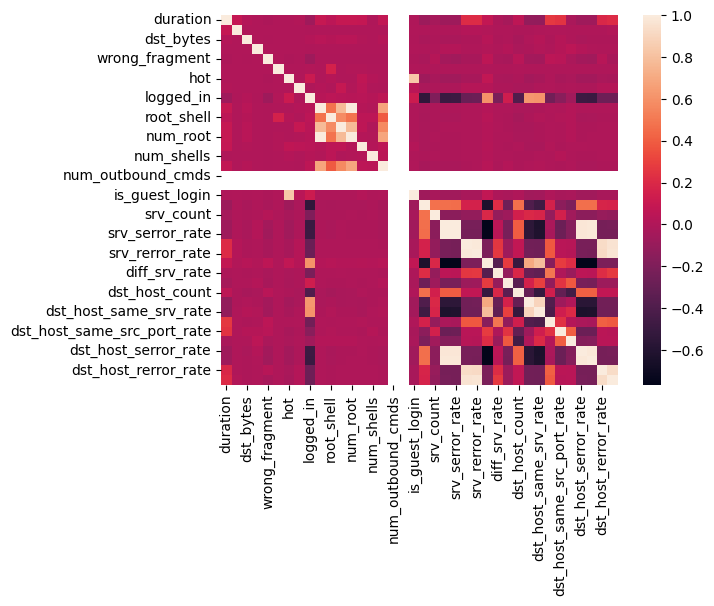

In [214]:
# Grafico de correlacion
sns.heatmap(corr_matrix)

In [215]:
# Vamos implementar un modelo de clasificacion para predecir intrusiones
# Primero vamos a dividir el dataset en train y test
# copiar dataset original

df2 = df.copy()
df2_test = df_test.copy()

In [216]:
# Convertimos las variables categoricas a numericas en los datos de train
df2['protocol_type'] = pd.factorize(df2['protocol_type'])[0]
df2['service'] = pd.factorize(df2['service'])[0]
df2['flag'] = pd.factorize(df2['flag'])[0]
df2['class'] = pd.factorize(df2['class'])[0]

In [217]:
# Convertimos las variables categoricas a numericas en los datos de test
df2_test['protocol_type'] = pd.factorize(df2_test['protocol_type'])[0]
df2_test['service'] = pd.factorize(df2_test['service'])[0]
df2_test['flag'] = pd.factorize(df2_test['flag'])[0]


In [218]:
# Imprimimos el dataset para verificar que las variables categoricas se convirtieron a numericas
df2.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,0,0,0,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,1,1,0,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,0,2,1,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,0,3,0,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,0,3,0,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [219]:
# Utilizamos la libreria sklearn
from sklearn.model_selection import train_test_split

# Definimos las variables independientes y dependientes
X = df2.drop('class', axis=1)
y = df2['class']

In [220]:
# Dividimos el dataset en train y test
# 70% train y 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Verificamos el tamaño de los datasets
print("X_train tiene {} registros".format(X_train.shape[0]), "y {} variables".format(X_train.shape[1]))
print("X_test tiene {} registros".format(X_test.shape[0]), "y {} variables".format(X_test.shape[1]))
print("y_train tiene {} registros".format(y_train.shape[0]))
print("y_test tiene {} registros".format(y_test.shape[0]))


X_train tiene 17634 registros y 41 variables
X_test tiene 7558 registros y 41 variables
y_train tiene 17634 registros
y_test tiene 7558 registros


In [221]:
# Un ejemplo de como se ve el dataset de entrenamiento
X_train.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
1565,0,0,9,1,0,0,0,0,0,0,...,255,14,0.05,0.07,0.0,0.00,1.0,1.0,0.00,0.0
4949,0,0,3,0,226,1787,0,0,0,0,...,219,255,1.00,0.00,0.0,0.01,0.0,0.0,0.00,0.0
14506,0,0,3,0,245,797,0,0,0,0,...,238,255,1.00,0.00,0.0,0.03,0.0,0.0,0.15,0.2
24564,0,1,11,0,45,127,0,0,0,0,...,255,237,0.93,0.01,0.0,0.00,0.0,0.0,0.00,0.0
15627,0,0,17,1,0,0,0,0,0,0,...,255,23,0.09,0.05,0.0,0.00,1.0,1.0,0.00,0.0


In [222]:
# Ejemplo de la variable dependiente
y_train.head()

1565     1
4949     0
14506    0
24564    0
15627    1
Name: class, dtype: int64

In [223]:
# Implementamos un modelo de regresion logistica

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

model_reglog = LogisticRegression(max_iter=10000)
model_reglog.fit(X_train, y_train)

# Predecimos los valores de test
y_pred = model_reglog.predict(X_test)

# Evaluamos el modelo
reglog_acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", reglog_acc)

Accuracy:  0.8732468907118285


<Axes: >

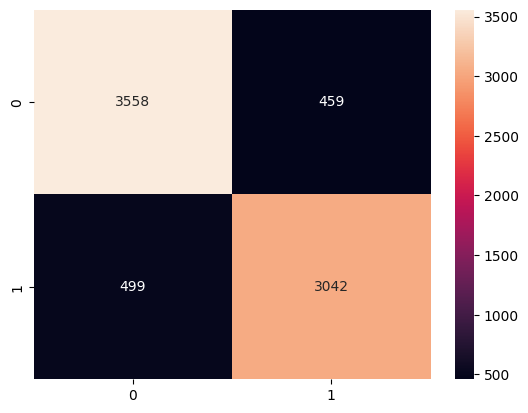

In [224]:
# Matriz de confusion
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

# Grafico de la matriz de confusion
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

In [225]:
# Implementamos un modelo de arbol de decision
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

# Predecimos los valores de test
y_pred = model_tree.predict(X_test)

# Evaluamos el modelo
tree_acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", tree_acc)


Accuracy:  0.9936491135220958


<Axes: >

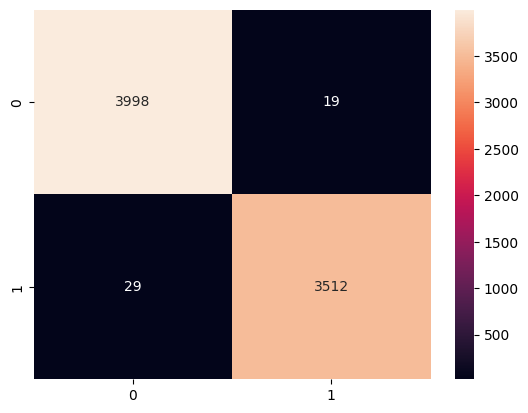

In [226]:
# Matriz de confusion
confusion_matrix(y_test, y_pred)

# Grafico de la matriz de confusion
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

In [227]:
# Implementamos un modelo de random forest
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# Predecimos los valores de test
y_pred = model_rf.predict(X_test)

# Evaluamos el modelo
rf_acc = accuracy_score(y_test, y_pred) 
print("Accuracy: ", rf_acc)

Accuracy:  0.9969568668960043


<Axes: >

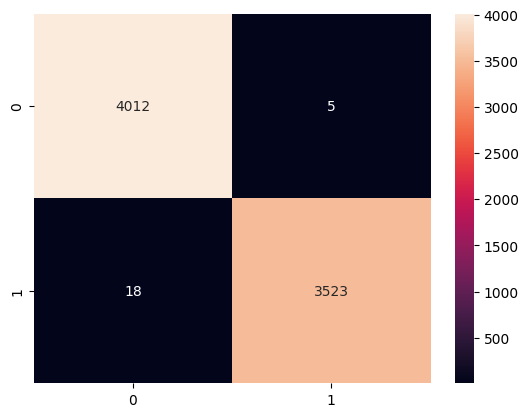

In [228]:
# Matriz de confusion
confusion_matrix(y_test, y_pred)

# Grafico de la matriz de confusion
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

In [229]:
# Implementamos un modelo de gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)

# Predecimos los valores de test

y_pred = model_gb.predict(X_test)

# Evaluamos el modelo
gb_acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", gb_acc)

Accuracy:  0.9945752844667901


<Axes: >

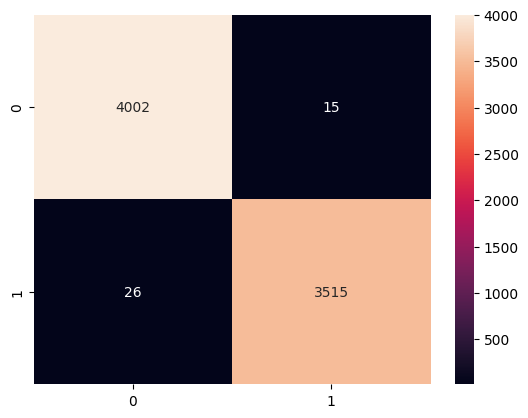

In [230]:
# Matriz de confusion
confusion_matrix(y_test, y_pred)

# Grafico de la matriz de confusion
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

In [231]:
# Tomo una fila de df2_test para predecir, lo abro como un datarame de pandas
x_prubea= df2_test.iloc[15987]

# Una fila de df_test
df_pred = pd.DataFrame(x_prubea).transpose()
df_pred





,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
15987,0.0,2.0,0.0,1.0,105.0,145.0,0.0,0.0,0.0,0.0,...,255.0,254.0,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0


In [232]:
# Predecimos la anomalia con el modelo de regresion logistica
y_pred = model_reglog.predict(df_pred)

# Imprimimos el resultado
print("Con Regresion logistica")

if y_pred == 0:
    print("No existe anomalia")
else:
    print("Alerta, Anomalia")

Con Regresion logistica
No existe anomalia


In [233]:
# Predecimos la anomalia con el modelo de arbol de decision
y_pred = model_tree.predict(df_pred)

# Imprimimos el resultado
print("Con Arbol de decision")

if y_pred == 0:
    print("No existe anomalia")
else:
    print("Alerta, Anomalia")
    

Con Arbol de decision
No existe anomalia


In [234]:
# Predecimos la anomalia con el modelo de random forest
y_pred = model_rf.predict(df_pred)

# Imprimimos el resultado
print("Con Random Forest")

if y_pred == 0:
    print("No existe anomalia")
else:
    print("Alerta, Anomalia")

Con Random Forest
No existe anomalia


In [235]:
# Predecimos la anomalia con el modelo de gradient boosting
y_pred = model_gb.predict(df_pred)

# Imprimimos el resultado
print("Con Gradient Boosting")

if y_pred == 0:
    print("No existe anomalia")
else:
    print("Alerta, Anomalia")
    

Con Gradient Boosting
No existe anomalia


In [236]:
# guardamos los modelos
import pickle

pickle.dump(model_reglog, open('model_reglog_intrusion.pkl', 'wb'))
pickle.dump(model_tree, open('model_tree_intrusion.pkl', 'wb'))
pickle.dump(model_rf, open('model_rf_intrusion.pkl', 'wb'))
pickle.dump(model_gb, open('model_gb_intrusion.pkl', 'wb'))


In [237]:
# Cargamos los modelos
model_reglog = pickle.load(open('model_reglog_intrusion.pkl', 'rb'))
model_tree = pickle.load(open('model_tree_intrusion.pkl', 'rb'))
model_rf = pickle.load(open('model_rf_intrusion.pkl', 'rb'))
model_gb = pickle.load(open('model_gb_intrusion.pkl', 'rb'))
